# Mandibular Morphology Prediction Using Matrix Completion

## Split dataset for training and test

In [2]:
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from numpy import genfromtxt

In [3]:
#load perfil data
perfil_lines = genfromtxt('../../data/Perfil_Lines.csv', delimiter=',')
perfil_angles = genfromtxt('../../data/Perfil_Angles.csv', delimiter=',')

Import labels of classification

In [4]:
perfil_class = genfromtxt('../../data/Perfil_class.csv', delimiter=',',skip_header=1)

In [5]:
print perfil_lines.shape, perfil_angles.shape, perfil_class.shape

(229, 301) (229, 6901) (229,)


In [6]:
perfil_all = np.concatenate((perfil_lines[:,1:], perfil_angles[:,1:]), axis=1)

In [7]:
perfil_all.shape

(229, 7200)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(perfil_all, perfil_class, test_size=0.3, random_state=42)

In [9]:
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(160, 7200) (69, 7200) (160,) (69,)


### Compute missing values (mandibular measures)

In [10]:
perfil_lines_mandibular_measures = genfromtxt('../../data/Perfil_Lines_type.csv', delimiter=',')
perfil_angles_mandibular_measures = genfromtxt('../../data/Perfil_Angles_type.csv', delimiter=',')

In [11]:
print perfil_lines_mandibular_measures.shape, perfil_angles_mandibular_measures.shape

(301,) (6901,)


In [12]:
# -1 if the measure includes a mandibular landmark, 0 otherwise
perfil_lines_mask_mandibular_measures = perfil_lines_mandibular_measures[1:]
perfil_angles_mask_mandibular_measures = perfil_angles_mandibular_measures[1:]
perfil_lines_mask_mandibular_measures[perfil_lines_mask_mandibular_measures > 0]=-1
perfil_angles_mask_mandibular_measures[perfil_angles_mask_mandibular_measures > 0]=-1
perfil_all_mask_mandibular_measures = np.concatenate((perfil_lines_mask_mandibular_measures, \
                                                      perfil_angles_mask_mandibular_measures))

/home/ajaque/anaconda2/envs/completion/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [13]:
print perfil_lines_mask_mandibular_measures.shape, perfil_angles_mask_mandibular_measures.shape, \
perfil_all_mask_mandibular_measures.shape

(300,) (6900,) (7200,)


In [14]:
perfil_lines_mask_mandibular_measures.sum()

-136.0

In [15]:
# 0 if the measure includes a mandibular landmark, 1 otherwise
perfil_angles_mask_mandibular_measures[perfil_angles_mask_mandibular_measures == 0] = 1
perfil_angles_mask_mandibular_measures[perfil_angles_mask_mandibular_measures == -1] = 0

In [16]:
perfil_all_mask_mandibular_measures = np.concatenate((perfil_lines_mask_mandibular_measures, \
                                                      perfil_angles_mask_mandibular_measures))

In [17]:
print X_test.shape, perfil_all_mask_mandibular_measures.shape

(69, 7200) (7200,)


## Matrix completion
Using fancyimpute methods 

### Preprocessing

In [18]:
# NaN if the measure includes a mandibular landmark, 1 otherwise
perfil_all_mask_mandibular_measures[perfil_all_mask_mandibular_measures == 0] = np.nan

In [19]:
X_test_masked = X_test*perfil_all_mask_mandibular_measures

In [20]:
print X_train.shape, X_test_masked.shape

(160, 7200) (69, 7200)


In [21]:
#Merge test and train
X_incomplete = np.concatenate((X_train,X_test_masked))
print X_incomplete.shape

(229, 7200)


In [22]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, IterativeSVD, MatrixFactorization

In [23]:
# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).complete(X_incomplete)

Imputing row 1/229 with 0 missing, elapsed time: 3.329
Imputing row 101/229 with 0 missing, elapsed time: 3.968
Imputing row 201/229 with 5500 missing, elapsed time: 7.369


In [24]:
# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
X_filled_softimpute = SoftImpute().complete(X_incomplete)

[SoftImpute] Max Singular Value of X_init = 118866.135949
[SoftImpute] Iter 1: observed MAE=1.047141 rank=4
[SoftImpute] Iter 2: observed MAE=1.046958 rank=4
[SoftImpute] Iter 3: observed MAE=1.047482 rank=4
[SoftImpute] Iter 4: observed MAE=1.048097 rank=4
[SoftImpute] Iter 5: observed MAE=1.048736 rank=4
[SoftImpute] Iter 6: observed MAE=1.049385 rank=4
[SoftImpute] Iter 7: observed MAE=1.050046 rank=4
[SoftImpute] Iter 8: observed MAE=1.050719 rank=4
[SoftImpute] Iter 9: observed MAE=1.051405 rank=4
[SoftImpute] Iter 10: observed MAE=1.052107 rank=4
[SoftImpute] Iter 11: observed MAE=1.052827 rank=4
[SoftImpute] Iter 12: observed MAE=1.053566 rank=4
[SoftImpute] Iter 13: observed MAE=1.054327 rank=4
[SoftImpute] Iter 14: observed MAE=1.055112 rank=4
[SoftImpute] Iter 15: observed MAE=1.055925 rank=4
[SoftImpute] Iter 16: observed MAE=1.056768 rank=4
[SoftImpute] Iter 17: observed MAE=1.057646 rank=4
[SoftImpute] Iter 18: observed MAE=1.058562 rank=4
[SoftImpute] Iter 19: observed MA

In [25]:
X_filled_mf = MatrixFactorization(rank=11).complete(X_incomplete)

train: 1 of 1 mini-batches from (229, 7200)
downhill: compiling evaluation function
downhill: compiling Adam optimizer
downhill: setting: rms_halflife = 14
downhill: setting: rms_regularizer = 1e-08
downhill: setting: patience = 5
downhill: setting: validate_every = 10
downhill: setting: min_improvement = 0.005
downhill: setting: max_gradient_norm = 5
downhill: setting: max_gradient_elem = 0
downhill: setting: learning_rate = TensorConstant{0.001}
downhill: setting: momentum = 0
downhill: setting: nesterov = False
downhill: validation 0 loss=9299.065729 error=9298.975775 grad(U)=0.353091 grad(V)=0.167394 *
downhill: Adam 1 loss=9299.065729 error=9298.975775 grad(U)=0.353091 grad(V)=0.167394
downhill: Adam 2 loss=9299.011637 error=9298.921777 grad(U)=0.355428 grad(V)=0.168347
downhill: Adam 3 loss=9298.938299 error=9298.848564 grad(U)=0.358761 grad(V)=0.169730
downhill: Adam 4 loss=9298.852025 error=9298.762436 grad(U)=0.362908 grad(V)=0.171494
downhill: Adam 5 loss=9298.756173 error=92

In [26]:
#Correction of 4 nan values, in perfil_angles
#0 6805
#0 6806
#114 5963
#114 5964

perfil_all = np.nan_to_num(perfil_all)

In [29]:
# print mean squared error for the three imputation methods above
nnm_mse = ((X_filled_mf - perfil_all) ** 2).mean()
print("MF MSE: %f" % nnm_mse)

softImpute_mse = ((X_filled_softimpute - perfil_all) ** 2).mean()
print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = ((X_filled_knn - perfil_all) ** 2).mean()
print("knnImpute MSE: %f" % knn_mse)

MF MSE: 9103.525477
SoftImpute MSE: 13203.549334
knnImpute MSE: 7617.260083


In [30]:
# print mean squared error for the three imputation methods above
nnm_mse = np.linalg.norm(perfil_all- X_filled_mf)/np.linalg.norm(perfil_all)
print("MF MSE: %f" % nnm_mse)

softImpute_mse = np.linalg.norm(perfil_all- X_filled_softimpute)/np.linalg.norm(perfil_all)
print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = np.linalg.norm(perfil_all- X_filled_knn)/np.linalg.norm(perfil_all)
print("knnImpute MSE: %f" % knn_mse)

MF MSE: 0.920919
SoftImpute MSE: 1.109078
knnImpute MSE: 0.842396


In [31]:
print 'Total measures: ',perfil_all.size
print 'Non incomplete measures: ',X_filled_mf.size - np.count_nonzero(np.isnan(X_filled_mf))
print 'Non incomplete measures: ',X_incomplete.size - np.count_nonzero(np.isnan(X_incomplete))

Total measures:  1648800
Non incomplete measures:  1648800
Non incomplete measures:  1269296


In [32]:
for i in range(perfil_angles.shape[0]):
    for j in range(perfil_angles.shape[1]):
        if np.isnan(perfil_angles[i,j]): print i, j

0 6805
0 6806
114 5963
114 5964


In [41]:
#Exploring rank for nmf
ranks = np.arange(4,28)
rse_lst = []
for i in ranks:
    X_filled_mf = MatrixFactorization(rank=20).complete(X_incomplete)
    rse_lst.append(np.linalg.norm(perfil_all- X_filled_mf)/np.linalg.norm(perfil_all))

train: 1 of 1 mini-batches from (229, 7200)
downhill: compiling evaluation function
downhill: compiling Adam optimizer
downhill: setting: rms_halflife = 14
downhill: setting: rms_regularizer = 1e-08
downhill: setting: patience = 5
downhill: setting: validate_every = 10
downhill: setting: min_improvement = 0.005
downhill: setting: max_gradient_norm = 5
downhill: setting: max_gradient_elem = 0
downhill: setting: learning_rate = TensorConstant{0.001}
downhill: setting: momentum = 0
downhill: setting: nesterov = False
downhill: validation 0 loss=9305.266723 error=9305.176896 grad(U)=0.599899 grad(V)=0.456573 *
downhill: Adam 1 loss=9305.266723 error=9305.176896 grad(U)=0.599899 grad(V)=0.456573
downhill: Adam 2 loss=9305.161553 error=9305.071815 grad(U)=0.600179 grad(V)=0.457948
downhill: Adam 3 loss=9305.019468 error=9304.929849 grad(U)=0.600901 grad(V)=0.460001
downhill: Adam 4 loss=9304.853062 error=9304.763582 grad(U)=0.602264 grad(V)=0.462724
downhill: Adam 5 loss=9304.669111 error=93

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,u'RSE')

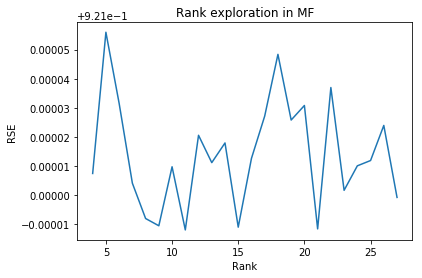

In [43]:
plt.plot(ranks, rse_lst)
plt.title('Rank exploration in MF')
plt.xlabel('Rank')
plt.ylabel('RSE')

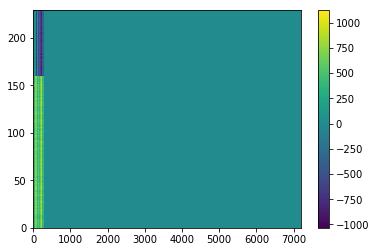

In [35]:
plt.pcolormesh(X_filled_mf)
plt.colorbar()

# Classification

In [36]:
X_filled_mf_rank100 = genfromtxt('../../data/outcome_mf.csv', delimiter=',')

In [37]:
nnm_mse = np.linalg.norm(perfil_all- np.abs(X_filled_mf_rank100))/np.linalg.norm(perfil_all)
print("MF MSE: %f" % nnm_mse)

MF MSE: 0.104993


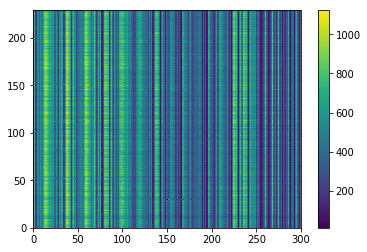

In [38]:
plt.pcolormesh(np.abs(X_filled_mf_rank100[:,:300]))
plt.colorbar()

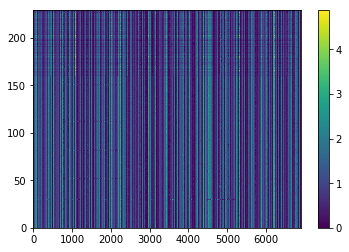

In [39]:
plt.pcolormesh(np.abs(X_filled_mf_rank100[:,300:]))
plt.colorbar()

In [40]:
from sklearn import svm

In [41]:
#Reconstructed matrix
X_train_, X_test_, y_train_, y_test_ = train_test_split(np.abs(X_filled_mf_rank100), perfil_class, test_size=0.3, random_state=42)

In [42]:
X_train_ = np.nan_to_num(X_train)

In [45]:
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[1]):
        if np.isnan(X_train[i,j]): print i, j

2 6262
2 6263
30 7104
30 7105


In [46]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train_, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
clf_linear.score(X_train_, y_train_)

1.0

In [48]:
pred_gt = clf_linear.predict(X_test)

In [49]:
pred_re = clf_linear.predict(X_test_)

In [50]:
clf_linear.score(X_test_, y_test_)

0.55072463768115942

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test, pred_re)

array([[ 3,  1,  8],
       [ 0,  0,  5],
       [11,  6, 35]])